In [1]:
import numpy as np

In [62]:
A = np.array([[1,-2,1,0],[0,2,-8,8],[-4,5,9,-9]])
A

array([[ 1, -2,  1,  0],
       [ 0,  2, -8,  8],
       [-4,  5,  9, -9]])

In [90]:
E = np.array([[1,0,0],[0,1/2,0],[4,0,1]])
E
a = np.dot(E,A)
a

array([[1. , 0. , 0. ],
       [0. , 0.5, 0. ],
       [4. , 0. , 1. ]])

array([[ 1., -2.,  1.],
       [ 0.,  1., -4.],
       [ 0., -3., 13.]])

In [70]:
e = np.array([[1,0,0],[0,1,0],[0,3,1]])
g = e.dot(a)
g

array([[ 1., -2.,  1.,  0.],
       [ 0.,  1., -4.,  4.],
       [ 0.,  0.,  1.,  3.]])

In [76]:
f = np.array([[1,0,0],[0,1,4],[0,0,1]])
f.dot(g)

array([[ 1., -2.,  1.,  0.],
       [ 0.,  1.,  0., 16.],
       [ 0.,  0.,  1.,  3.]])

In [86]:
h=np.array([[1,2,-1],[0,1,0],[0,0,1]])
h.dot(f.dot(g))

array([[ 1.,  0.,  0., 29.],
       [ 0.,  1.,  0., 16.],
       [ 0.,  0.,  1.,  3.]])

In [88]:
h.dot(f).dot(e).dot(E)

array([[29. , 11.5,  7. ],
       [16. ,  6.5,  4. ],
       [ 4. ,  1.5,  1. ]])

In [98]:
A = np.array([[1,-2,1],[0,2,-8],[-4,5,9]])
y = np.array([0,8,-9])
np.linalg.solve(A,y)
np.linalg.inv(A)

array([29., 16.,  3.])

array([[29. , 11.5,  7. ],
       [16. ,  6.5,  4. ],
       [ 4. ,  1.5,  1. ]])

In [20]:
np.linalg.det(A)

1.9999999999999998

In [26]:
a = np.array([[1,2],[4,5]])
np.linalg.det(a)
a

-2.9999999999999996

array([[1, 2],
       [4, 5]])

In [94]:
1*5-2*4
np.linalg.norm(a/np.linalg.norm(a))

-3

1.0

In [7]:
X = np.array([[1,2],[1,5],[1,7],[1,8]])
y = np.array([1,2,3,3])

In [5]:
X.T.dot(X)

array([[  4,  22],
       [ 22, 142]])

In [8]:
X.T.dot(y)

array([ 9, 57])

In [10]:
np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

array([0.28571429, 0.35714286])

In [12]:
2/7
5/14

0.2857142857142857

0.35714285714285715

In [7]:
import urllib.request
import zipfile
import os

In [8]:
url = 'https://files.grouplens.org/datasets/movielens/ml-100k.zip'
urllib.request.urlretrieve(url, 'ml-100k.zip')
with zipfile.ZipFile('ml-100k.zip', 'r') as f:
    f.extractall('.')
print('done')

('ml-100k.zip', <http.client.HTTPMessage at 0x28352b85ea0>)

done


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 加载数据
ratings = pd.read_csv('ml-100k/u.data', sep='\t',
                      names=['user_id', 'item_id', 'rating', 'timestamp'])
movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1',
                     names=['item_id', 'title'] + [f'c{i}' for i in range(22)],
                     usecols=['item_id', 'title'])

print(f'评分数量: {len(ratings)}')
print(f'用户数量: {ratings.user_id.nunique()}')
print(f'电影数量: {ratings.item_id.nunique()}')
print(f'稀疏度: {1 - len(ratings) / (943 * 1682):.2%}')

评分数量: 100000
用户数量: 943
电影数量: 1682
稀疏度: 93.70%


In [10]:
# 划分训练测试集
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

n_users = ratings.user_id.max()
n_items = ratings.item_id.max()

# 构建训练矩阵
R_train = np.zeros((n_users, n_items))
for row in train_data.itertuples():
    R_train[row.user_id - 1][row.item_id - 1] = row.rating

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 加载数据
ratings = pd.read_csv('ml-100k/u.data', sep='\t',
                      names=['user_id', 'item_id', 'rating', 'timestamp'])
movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1',
                     names=['item_id', 'title'] + [f'c{i}' for i in range(22)],
                     usecols=['item_id', 'title'])

# 划分训练测试集
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)


In [15]:
# 全量数据的最大值
n_users = ratings.user_id.max()
n_items = ratings.item_id.max()


class FunkSVD:
    def __init__(self, n_users, n_items, n_factors=20, lr=0.005, reg=0.02, n_epochs=50):
        self.n_factors = n_factors
        self.lr = lr
        self.reg = reg
        self.n_epochs = n_epochs
        self.mu = 0
        self.P = np.random.normal(0, 0.1, (n_users, n_factors))
        self.Q = np.random.normal(0, 0.1, (n_items, n_factors))
        self.bu = np.zeros(n_users)
        self.bi = np.zeros(n_items)

    def fit(self, train_df, test_df=None):
        global test_rmse
        users = train_df.user_id.values - 1
        items = train_df.item_id.values - 1
        rates = train_df.rating.values
        self.mu = rates.mean()

        train_rmse_list, test_rmse_list = [], []

        for epoch in range(self.n_epochs):
            idx = np.random.permutation(len(users))
            for i in idx:
                u, v, r = users[i], items[i], rates[i]
                pred = self.mu + self.bu[u] + self.bi[v] + self.P[u] @ self.Q[v]
                e = r - pred
                self.bu[u] += self.lr * (e - self.reg * self.bu[u])
                self.bi[v] += self.lr * (e - self.reg * self.bi[v])
                P_u = self.P[u].copy()
                self.P[u] += self.lr * (e * self.Q[v] - self.reg * self.P[u])
                self.Q[v] += self.lr * (e * P_u - self.reg * self.Q[v])

            train_rmse = self._rmse(train_df)
            train_rmse_list.append(train_rmse)

            if test_df is not None:
                test_rmse = self._rmse(test_df)
                test_rmse_list.append(test_rmse)

            if (epoch + 1) % 10 == 0:
                msg = f'Epoch {epoch+1}/{self.n_epochs} - Train RMSE: {train_rmse:.4f}'
                if test_df is not None:
                    msg += f' - Test RMSE: {test_rmse:.4f}'
                print(msg)

        return train_rmse_list, test_rmse_list

    def _rmse(self, df):
        preds, actuals = [], []
        for row in df.itertuples():
            preds.append(self.predict(row.user_id, row.item_id))
            actuals.append(row.rating)
        return np.sqrt(mean_squared_error(actuals, preds))

    def predict(self, user_id, item_id):
        u, v = user_id - 1, item_id - 1
        pred = self.mu + self.bu[u] + self.bi[v] + self.P[u] @ self.Q[v]
        return float(np.clip(pred, 1, 5))

    def recommend(self, user_id, train_df, movies_df, top_n=10):
        rated = set(train_df[train_df.user_id == user_id].item_id.values)
        all_items = set(movies_df.item_id.values)
        unrated = all_items - rated

        preds = [(iid, self.predict(user_id, iid)) for iid in unrated]
        preds.sort(key=lambda x: x[1], reverse=True)

        result = []
        for item_id, score in preds[:top_n]:
            title = movies_df[movies_df.item_id == item_id]['title'].values[0]
            result.append({'电影': title, '预测评分': round(score, 2)})
        return pd.DataFrame(result)

    def precision_recall_at_k(self, test_df, train_df, movies_df, k=10, threshold=4.0):
        precisions, recalls = [], []
        for user_id in test_df.user_id.unique():
            rated = set(train_df[train_df.user_id == user_id].item_id.values)
            unrated = set(movies_df.item_id.values) - rated
            preds = sorted([(iid, self.predict(user_id, iid))
                            for iid in unrated], key=lambda x: x[1], reverse=True)
            recommended = set([p[0] for p in preds[:k]])
            actual = set(test_df[(test_df.user_id == user_id) &
                                 (test_df.rating >= threshold)].item_id.values)
            if not actual:
                continue
            hit = len(actual & recommended)
            precisions.append(hit / k)
            recalls.append(hit / len(actual))
        return np.mean(precisions), np.mean(recalls)

Epoch 10/40 - Train RMSE: 0.9112 - Test RMSE: 0.9424
Epoch 20/40 - Train RMSE: 0.8772 - Test RMSE: 0.9324
Epoch 30/40 - Train RMSE: 0.8246 - Test RMSE: 0.9219
Epoch 40/40 - Train RMSE: 0.7695 - Test RMSE: 0.9176


<Figure size 800x400 with 0 Axes>

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'RMSE')

Text(0.5, 1.0, 'FunkSVD学习曲线')

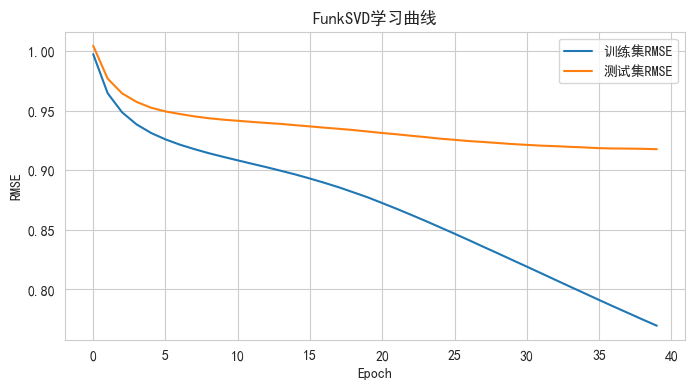


最终测试集RMSE: 0.9176
Precision@10: 0.1410
Recall@10:    0.0568
F1@10:        0.0810

=== 用户1的推荐 ===
                                                                         电影  预测评分
                                                               Fargo (1996)  5.00
                                                      Close Shave, A (1995)  5.00
                                                Fish Called Wanda, A (1988)  4.81
                                                           Duck Soup (1933)  4.75
                                                   L.A. Confidential (1997)  4.73
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)  4.71
                                           Manchurian Candidate, The (1962)  4.70
                                                     Pather Panchali (1955)  4.68
                                                  Lawrence of Arabia (1962)  4.66
                                                         Rear Window (1954)  4.65


In [17]:
# 训练
model = FunkSVD(n_users=n_users, n_items=n_items,
                n_factors=20, lr=0.005, reg=0.05, n_epochs=40)
train_rmse, test_rmse = model.fit(train_data, test_data)

# 学习曲线
plt.figure(figsize=(8, 4))
plt.plot(train_rmse, label='训练集RMSE')
plt.plot(test_rmse, label='测试集RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('FunkSVD学习曲线')
plt.legend()
plt.grid(True)
plt.show()

# 最终评估
print(f'\n最终测试集RMSE: {test_rmse[-1]:.4f}')

# Precision和Recall（只取100个用户，否则太慢）
sample_users = test_data.user_id.unique()[:100]
sample_test = test_data[test_data.user_id.isin(sample_users)]
p, r = model.precision_recall_at_k(sample_test, train_data, movies, k=10)
f1 = 2 * p * r / (p + r) if (p + r) > 0 else 0
print(f'Precision@10: {p:.4f}')
print(f'Recall@10:    {r:.4f}')
print(f'F1@10:        {f1:.4f}')

# 为用户生成推荐
for uid in [1, 2, 3]:
    print(f'\n=== 用户{uid}的推荐 ===')
    print(model.recommend(uid, train_data, movies).to_string(index=False))

In [18]:
import pickle

with open('funksvd_model.pkl', 'wb') as f:
    pickle.dump(model, f)

train_data.to_csv('train_data.csv', index=False)
movies.to_csv('movies.csv', index=False)

print('保存完成')
print(f'模型文件: funksvd_model.pkl')
print(f'训练数据: train_data.csv')
print(f'电影数据: movies.csv')

保存完成
模型文件: funksvd_model.pkl
训练数据: train_data.csv
电影数据: movies.csv


In [19]:
# 在jupyter里运行，看一下类型数据
import pandas as pd

# ml-100k的u.item包含类型信息
movies_full = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1',
                          names=['item_id', 'title', 'release_date', 'video_date', 'imdb_url',
                                 'unknown', 'Action', 'Adventure', 'Animation', 'Children',
                                 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                                 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
                                 'Sci-Fi', 'Thriller', 'War', 'Western'])

genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
              'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

print(movies_full[['item_id', 'title'] + genre_cols].head(10))
print(f'\n类型列数: {len(genre_cols)}')
print(f'\n每种类型的电影数量:')
print(movies_full[genre_cols].sum().sort_values(ascending=False))

   item_id                                              title  Action  \
0        1                                   Toy Story (1995)       0   
1        2                                   GoldenEye (1995)       1   
2        3                                  Four Rooms (1995)       0   
3        4                                  Get Shorty (1995)       1   
4        5                                     Copycat (1995)       0   
5        6  Shanghai Triad (Yao a yao yao dao waipo qiao) ...       0   
6        7                              Twelve Monkeys (1995)       0   
7        8                                        Babe (1995)       0   
8        9                            Dead Man Walking (1995)       0   
9       10                                 Richard III (1995)       0   

   Adventure  Animation  Children  Comedy  Crime  Documentary  Drama  Fantasy  \
0          0          1         1       1      0            0      0        0   
1          1          0         0 

In [20]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
              'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# 构建电影类型矩阵
movies_full = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1',
                          names=['item_id', 'title', 'release_date', 'video_date', 'imdb_url',
                                 'unknown'] + genre_cols)

# 计算电影之间的类型相似度矩阵
genre_matrix = movies_full[genre_cols].values
item_similarity = cosine_similarity(genre_matrix)
print(f'电影类型相似度矩阵形状: {item_similarity.shape}')

电影类型相似度矩阵形状: (1682, 1682)


In [21]:
def hybrid_recommend(user_id, model, train_data, movies_full, 
                     item_similarity, genre_cols, alpha=0.7, top_n=10):
    """
    alpha: FunkSVD的权重，1-alpha是内容过滤的权重
    """
    # 找出用户看过和没看过的电影
    user_rated = train_data[train_data.user_id == user_id]
    rated_items = user_rated.item_id.values
    all_items = movies_full.item_id.values
    unrated_items = np.setdiff1d(all_items, rated_items)

    if len(rated_items) == 0:
        return None, '用户没有历史评分'

    results = []
    for item_id in unrated_items:
        # 1. FunkSVD预测评分（归一化到0-1）
        cf_score = (model.predict(user_id, item_id) - 1) / 4

        # 2. 内容相似度得分
        # 找出用户喜欢的电影（评分>=4）
        liked_items = user_rated[user_rated.rating >= 4].item_id.values

        if len(liked_items) > 0:
            # 计算候选电影和用户喜欢电影的平均相似度
            item_idx = item_id - 1
            liked_idx = liked_items - 1
            # 防止索引越界
            liked_idx = liked_idx[liked_idx < item_similarity.shape[0]]
            if len(liked_idx) > 0:
                content_score = item_similarity[item_idx][liked_idx].mean()
            else:
                content_score = 0.5
        else:
            content_score = 0.5

        # 3. 混合得分
        hybrid_score = alpha * cf_score + (1 - alpha) * content_score

        results.append({
            'item_id': item_id,
            'cf_score': round(cf_score * 4 + 1, 2),      # 还原到1-5分
            'content_score': round(content_score, 4),
            'hybrid_score': round(hybrid_score, 4)
        })

    # 按混合得分排序
    results.sort(key=lambda x: x['hybrid_score'], reverse=True)

    # 拼接电影信息
    output = []
    for r in results[:top_n]:
        movie = movies_full[movies_full.item_id == r['item_id']].iloc[0]
        genres = [g for g in genre_cols if movie[g] == 1]
        output.append({
            'rank': len(output) + 1,
            'title': movie['title'],
            'genres': ', '.join(genres),
            'cf_score': r['cf_score'],
            'content_score': r['content_score'],
            'hybrid_score': r['hybrid_score']
        })

    return pd.DataFrame(output), None

In [22]:
# 对比纯协同过滤和混合推荐的结果
user_id = 1

print('=== 纯协同过滤推荐 ===')
cf_rec = model.recommend(user_id, train_data, movies_full[['item_id', 'title']], top_n=10)
print(cf_rec.to_string(index=False))

print('\n=== 混合推荐（α=0.7）===')
hybrid_rec, err = hybrid_recommend(user_id, model, train_data, movies_full,
                                   item_similarity, genre_cols, alpha=0.7, top_n=10)
print(hybrid_rec[['rank', 'title', 'genres', 'cf_score', 'hybrid_score']].to_string(index=False))

=== 纯协同过滤推荐 ===
                                                                         电影  预测评分
                                                               Fargo (1996)  5.00
                                                      Close Shave, A (1995)  5.00
                                                Fish Called Wanda, A (1988)  4.81
                                                           Duck Soup (1933)  4.75
                                                   L.A. Confidential (1997)  4.73
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)  4.71
                                           Manchurian Candidate, The (1962)  4.70
                                                     Pather Panchali (1955)  4.68
                                                  Lawrence of Arabia (1962)  4.66
                                                         Rear Window (1954)  4.65

=== 混合推荐（α=0.7）===
 rank                                        title            

In [23]:
# 看看用户的口味偏好
def user_genre_preference(user_id, train_data, movies_full, genre_cols):
    liked = train_data[(train_data.user_id == user_id) & (train_data.rating >= 4)]
    liked_movies = movies_full[movies_full.item_id.isin(liked.item_id)]
    pref = liked_movies[genre_cols].sum().sort_values(ascending=False)
    pref = pref[pref > 0]
    print(f'\n用户{user_id}喜欢的电影类型:')
    for genre, count in pref.items():
        bar = '█' * int(count)
        print(f'  {genre:15s} {bar} ({int(count)}部)')

user_genre_preference(1, train_data, movies_full, genre_cols)
user_genre_preference(2, train_data, movies_full, genre_cols)
user_genre_preference(3, train_data, movies_full, genre_cols)


用户1喜欢的电影类型:
  Drama           █████████████████████████████████████████████████████████████████ (65部)
  Comedy          ████████████████████████████████████████ (40部)
  Action          ███████████████████████████████ (31部)
  Sci-Fi          ██████████████████████████ (26部)
  Thriller        ████████████████████████ (24部)
  Romance         ██████████████████████ (22部)
  Crime           █████████████ (13部)
  Adventure       █████████████ (13部)
  War             ██████████ (10部)
  Horror          ███████ (7部)
  Musical         ████ (4部)
  Children        ███ (3部)
  Mystery         ███ (3部)
  Western         ██ (2部)
  Documentary     ██ (2部)
  Animation       ██ (2部)
  Fantasy         █ (1部)
  Film-Noir       █ (1部)

用户2喜欢的电影类型:
  Drama           ████████████████████ (20部)
  Romance         ████████████ (12部)
  Comedy          ███████████ (11部)
  Action          ██████ (6部)
  Crime           ████ (4部)
  Thriller        ████ (4部)
  Adventure       ███ (3部)
  War             ██ (2部)
  Child

In [24]:
print('=== 混合推荐（α=0.7）===')
hybrid_rec, err = hybrid_recommend(1, model, train_data, movies_full,
                                   item_similarity, genre_cols, alpha=0.7, top_n=10)
if err:
    print(err)
else:
    print(hybrid_rec[['rank', 'title', 'genres', 'cf_score', 'hybrid_score']].to_string(index=False))

# 对比用户3（口味更集中，内容过滤应该更有帮助）
print('\n=== 用户3混合推荐 ===')
hybrid_rec3, _ = hybrid_recommend(3, model, train_data, movies_full,
                                  item_similarity, genre_cols, alpha=0.7, top_n=10)
print(hybrid_rec3[['rank', 'title', 'genres', 'cf_score', 'hybrid_score']].to_string(index=False))

=== 混合推荐（α=0.7）===
 rank                                        title                      genres  cf_score  hybrid_score
    1                                 Fargo (1996)      Crime, Drama, Thriller      5.00        0.8000
    2 Rosencrantz and Guildenstern Are Dead (1990)               Comedy, Drama      4.61        0.7641
    3                        Close Shave, A (1995) Animation, Comedy, Thriller      5.00        0.7629
    4                       Pather Panchali (1955)                       Drama      4.68        0.7616
    5                                 8 1/2 (1963)                       Drama      4.62        0.7523
    6                           Down by Law (1986)               Comedy, Drama      4.54        0.7507
    7                  Fish Called Wanda, A (1988)                      Comedy      4.81        0.7358
    8                        Secrets & Lies (1996)                       Drama      4.49        0.7290
    9                    As Good As It Gets (1997)    

你的代码正确率还可以 ,改过一次就能跑了8:17 PM谢谢，不过还是给你添麻烦了。主要是之前没有完整考虑n_users/n_items的边界问题，一次就改好是因为错误信息很明确。
训练结果怎么样，RMSE跑出来是多少？跑完我们继续做阶段2的Flask部分。